In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
cols = df.columns
numerical_cols = []
categorical_cols = []
for column in cols:
    if df[column].dtype == 'object':
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)
print(numerical_cols, len(numerical_cols), categorical_cols, len(categorical_cols), sep='\n')

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
7
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ddaf572d0>,
      dtype=object)

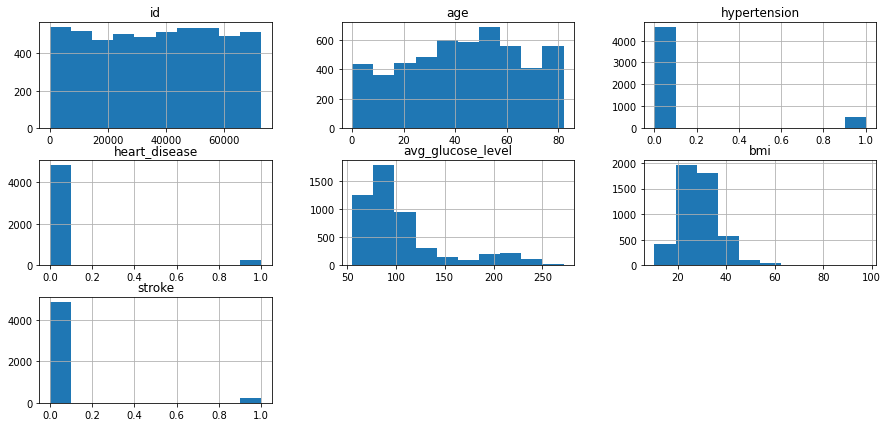

In [ ]:
df[numerical_cols].hist(figsize=(15,7))

In [ ]:
df.replace(['Female','Male','Other'],[0,1,2],inplace=True)
df.replace(['No','Yes'],[0,1],inplace=True)
df.replace(['Private','Self-employed','Govt_job','children','Never_worked'],[1,2,3,4,5],inplace=True)
df.replace(['Rural','Urban'],[0,1],inplace=True)
df.replace(['formerly smoked','never smoked','smokes'],[1,2,3],inplace=True)
df.drop(df.index[df['smoking_status'] == 'Unknown'], inplace = True)

In [ ]:
df['bmi'].fillna(df['bmi'].median(),inplace = True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
corr_mat = df.corr()
corr_mat

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
id,1.000000,-0.000518,-0.000581,0.000898,0.013567,0.008887,-0.002587,-0.000284,0.000915,0.000414,-0.002587
gender,-0.000518,1.000000,0.041649,0.034252,0.100500,0.021762,0.010432,-0.015757,0.066895,0.011721,0.015331
age,-0.000581,0.041649,1.000000,0.269664,0.264300,0.523428,0.012482,0.018400,0.232698,0.076189,0.250794
hypertension,0.000898,0.034252,0.269664,1.000000,0.105633,0.117222,0.014450,-0.008270,0.164568,0.124336,0.134717
heart_disease,0.013567,0.100500,0.264300,0.105633,1.000000,0.079790,-0.009006,0.016091,0.148222,-0.001262,0.129346
ever_married,0.008887,0.021762,0.523428,0.117222,0.079790,1.000000,-0.041985,0.012400,0.122544,0.152127,0.078076
work_type,-0.002587,0.010432,0.012482,0.014450,-0.009006,-0.041985,1.000000,0.024402,0.014577,-0.055556,-0.008734
Residence_type,-0.000284,-0.015757,0.018400,-0.008270,0.016091,0.012400,0.024402,1.000000,-0.009749,-0.008076,0.007872
avg_glucose_level,0.000915,0.066895,0.232698,0.164568,0.148222,0.122544,0.014577,-0.009749,1.000000,0.149169,0.128714
bmi,0.000414,0.011721,0.076189,0.124336,-0.001262,0.152127,-0.055556,-0.008076,0.149169,1.000000,0.008198


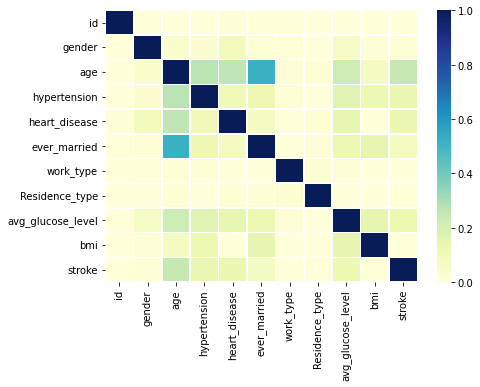

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.heatmap(corr_mat, vmin=0, vmax=1, linewidths=.5, cmap="YlGnBu")

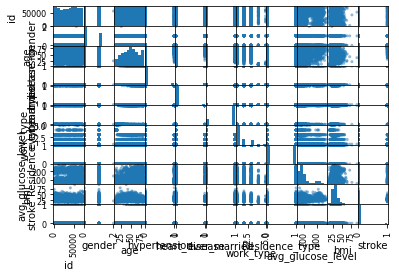

In [ ]:
from pandas.plotting import scatter_matrix

plot = scatter_matrix(df)
plt.show()

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
print("x: ")
print(x)
print("y: ")
print(y)

x: 
[[1 67.0 0 ... 228.69 36.6 1]
 [0 61.0 0 ... 202.21 29.1 2]
 [1 80.0 0 ... 105.92 32.5 2]
 ...
 [0 81.0 0 ... 125.2 40.0 2]
 [0 35.0 0 ... 82.99 30.6 2]
 [1 51.0 0 ... 166.29 25.6 1]]
y: 
[1 1 1 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state= 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear", random_state=0)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
c = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ")
print(c)
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Confusion Matrix: 
[[675   0]
 [ 39   0]]
Accuracy of the Model: 94.53781512605042%
